In [ ]:
import matplotlib.pyplot as plt
import mikeio

In [ ]:
fn = "../tests/testdata/spectra/MIKE21SW_dir_sector_area_spectra.dfsu"
dfs = mikeio.open(fn)
dfs

<mikeio.DfsuSpectral>
number of nodes: 33
number of elements: 40
number of directions: 19
number of frequencies: 25
projection: LONG/LAT
items:
 0: Energy density <Wave energy density> (meter pow 2 sec per deg)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (3 records)

In [ ]:
dfs.geometry.is_spectral

True

In [ ]:
da = dfs.read(time=0)["Energy density"]
da

<mikeio.DataArray>
name: Energy density
dims: (element:40, direction:19, frequency:25)
time: 2017-10-27 00:00:00 (time-invariant)
geometry: DfsuSpectral2D (40 elements, 33 nodes)

In [ ]:
da.plot();

In [ ]:
da_pt = da.isel(element=0)
da_pt

<mikeio.DataArray>
name: Energy density
dims: (direction:19, frequency:25)
time: 2017-10-27 00:00:00 (time-invariant)
geometry: Point Spectrum Geometry(frequency:25, direction:19, x:2.58616, y:52.13755)

In [ ]:
da_pt.plot(rmax=10, vmin=0);

In [ ]:
fn_1 = '../tests/testdata/spectra/pt_freq_spectra.dfsu'

In [ ]:
da_1 = mikeio.read(fn_1)[0]
da_1

<mikeio.DataArray>
name: Point 1: Directional integrated energy d
dims: (time:31, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (31 records)
geometry: Point Spectrum Geometry(frequency:25, direction:0)

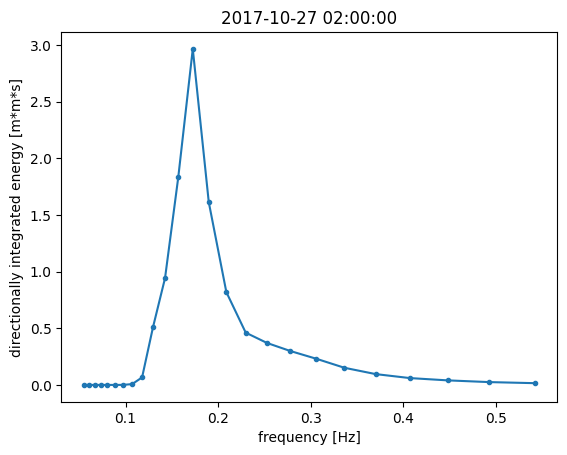

In [ ]:
da_1.sel(time='2017-10-27 02:00').plot()

In [ ]:
da_1.frequencies

array([0.055 , 0.0605 , 0.06655 , 0.073205 , 0.0805255 ,
 0.08857805, 0.09743585, 0.10717944, 0.11789738, 0.12968713,
 0.14265583, 0.15692142, 0.17261356, 0.18987492, 0.20886241,
 0.22974865, 0.25272352, 0.27799585, 0.30579546, 0.336375 ,
 0.3700125 , 0.40701374, 0.44771513, 0.49248663, 0.5417353 ],
 dtype=float32)

In [ ]:
Hm0 = da_1.to_Hm0()
Hm0

<mikeio.DataArray>
name: Significant wave height
dims: (time:31)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (31 records)
geometry: GeometryUndefined()
values: [1.61, 1.641, ..., 1.856]

In [ ]:
Hm0.plot();

In [ ]:
fn_2 = '../tests/testdata/spectra/area_freq_spectra.dfsu'
da_2 = mikeio.read(fn_2)[0]
da_2

<mikeio.DataArray>
name: Directional integrated energy density
dims: (time:3, element:40, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (3 records)
geometry: DfsuSpectral2D (40 elements, 33 nodes)

In [ ]:
(da_2.n_frequencies, da_2.n_directions)

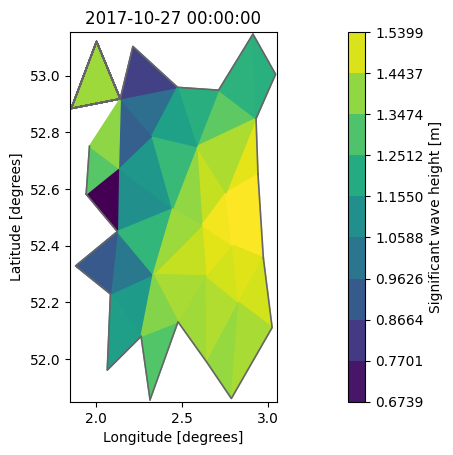

In [ ]:
da_2.plot()

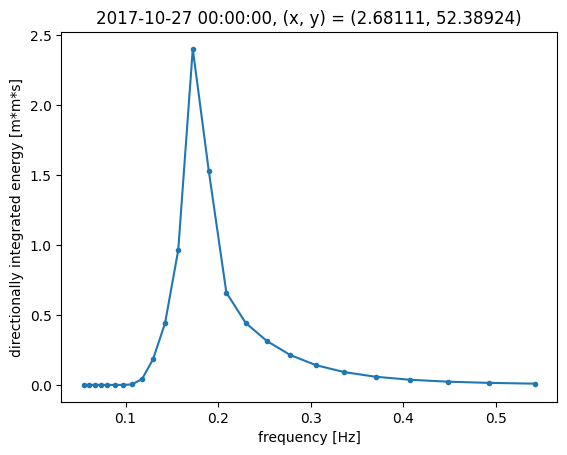

In [ ]:
da_2.sel(x=2.7, y=52.4).plot()

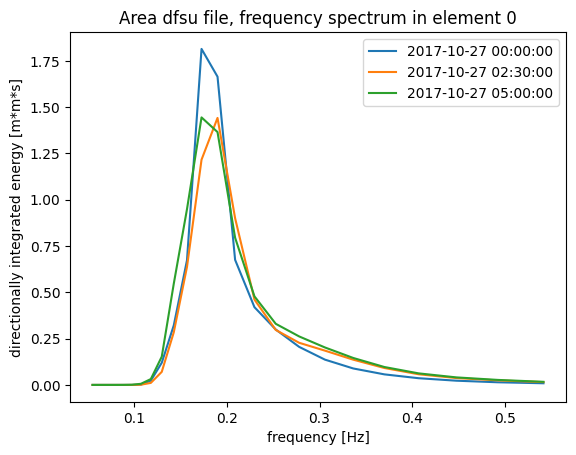

In [ ]:
elem = 0
plt.plot(da_2.frequencies, da_2[:, elem].to_numpy().T)
plt.legend(da_2.time)
plt.xlabel('frequency [Hz]')
plt.ylabel('directionally integrated energy [m*m*s]')
plt.title(f'Area dfsu file, frequency spectrum in element {elem}')

In [ ]:
fn_3 = '../tests/testdata/spectra/line_dir_spectra.dfsu'
da_3 = mikeio.read(fn_3)[0]
da_3

<mikeio.DataArray>
name: Frequency integrated energy density
dims: (time:4, node:10, direction:16)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (4 records)
geometry: DfsuSpectral1D (9 elements, 10 nodes)

In [ ]:
(da_3.n_frequencies, da_3.n_directions)

In [ ]:
da5 = da_3.isel(time=0).isel(node=5)
da5

<mikeio.DataArray>
name: Frequency integrated energy density
dims: (direction:16)
time: 2017-10-27 00:00:00 (time-invariant)
geometry: Point Spectrum Geometry(frequency:0, direction:16, x:4.21642, y:52.90296)
values: [0.04428, 0.01052, ..., 0.08194]

In [ ]:
da5.plot();

In [ ]:
import marimo as mo

# More Dfsu spectral files

## Output from directional-sector-MIKE 21 SW run

MIKE 21 SW can be run with dicretized directions only in a directional sector. The reading and plotting of such spectra are also supported in MIKE IO.

## Frequency spectra

Frequency spectra have 0 directions. They can be of type point, line and area.

### Point frequency spectrum

Compute significant wave height time series

### Area frequency spectra

## Directional spectra

Directional spectra have 0 frequencies. They can be of type point, line and area.

### Line directional spectra